# RoboTutor Data Analysis

## Importing libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np

In [2]:
from datetime import datetime
import dateutil

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [4]:
import math

## Defining data folders

In [5]:
folder_data = '/home/amogh/Desktop/CMU/LearnLab_Summer_School/Data/'

In [6]:
folder_beta_sites_data = '/home/amogh/Desktop/CMU/LearnLab_Summer_School/Data/beta_sites_upto_27_july/'

In [7]:
path_data_beta_sites = folder_beta_sites_data + 'ds2577_tx_All_Data_4463_2018_0728_005503.txt'

In [8]:
path_data_field = folder_data + 'fieldnew.txt'

## Loading raw data

### Beta Sites

In [9]:
df_data_beta_sites = pd.read_csv(path_data_beta_sites, sep = '\t')

/home/amogh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,75,76,79,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Visualising data**

In [10]:
len(set(df_data_beta_sites['Anon Student Id'].values.tolist()))

229

In [11]:
df_data_beta_sites.head()

,Row,Sample Name,Transaction Id,Anon Student Id,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Student School),CF (Student Used Scaffold),CF (Tablet Name),CF (Tablet Number),CF (Total Activity Problems),CF (Tutor Sequence Session),CF (Tutor Sequence User),CF (Unix Epoch),CF (User Id Order),CF (Version)
0,1,All Data,556a357f1676e9f396b472affacf1052,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:15,NaN,0,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,2,sw.1.8.9.1
1,2,All Data,19b3b667ff8f23ef0eff507504b00b7e,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:20,NaN,5,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,3,sw.1.8.9.1
2,3,All Data,8e06a2e8593ad9e657942d8bed372ee7,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:24,NaN,4,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,4,sw.1.8.9.1
3,4,All Data,84127ffce7384bbbb55d6075633012ac,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:28,NaN,4,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,5.0,1,1,1.525356e+12,5,sw.1.8.9.1
4,5,All Data,a9afc7bf3339a253b07e1ae593a9663b,20180421_081922-0-52000266fecfa4e5,52000266fecfa4e5_20180503_095852,2018-05-03 12:59:55,NaN,27,NaN,NaN,...,NaN,NaN,3,52000266fecfa4e5,9.0,2,2,1.525356e+12,6,sw.1.8.9.1


In [12]:
list_columns_df_beta_sites = df_data_beta_sites.columns.values
list_columns_df_beta_sites

array(['Row', 'Sample Name', 'Transaction Id', 'Anon Student Id',
       'Session Id', 'Time', 'Time Zone', 'Duration (sec)',
       'Student Response Type', 'Student Response Subtype',
       'Tutor Response Type', 'Tutor Response Subtype',
       'Level (Tutor Name)', 'Level (Tutor)', 'Problem Name',
       'Problem View', 'Problem Start Time', 'Step Name',
       'Attempt At Step', 'Is Last Attempt', 'Outcome', 'Selection',
       'Action', 'Input', 'Feedback Text', 'Feedback Classification',
       'Help Level', 'Total Num Hints', 'KC (Tutor)',
       'KC Category (Tutor)', 'KC (Tutor Problem Name)',
       'KC Category (Tutor Problem Name)', 'KC (Village)',
       'KC Category (Village)', 'KC (Matrix)', 'KC Category (Matrix)',
       'KC (Order)', 'KC Category (Order)', 'KC (Channel)',
       'KC Category (Channel)', 'KC (Option Behavior)',
       'KC Category (Option Behavior)', 'KC (Content)',
       'KC Category (Content)', 'KC (Content By Tutor)',
       'KC Category (Content 

### Field Site

In [13]:
df_data_field = pd.read_csv(path_data_field, sep = '\t')

/home/amogh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,7,54,55,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
list_columns_df_field = df_data_field.columns.values
list_columns_df_field

array(['Row', 'Sample Name', 'Transaction Id', 'Anon Student Id',
       'Session Id', 'Time', 'Time Zone', 'Duration (sec)',
       'Student Response Type', 'Student Response Subtype',
       'Tutor Response Type', 'Tutor Response Subtype',
       'Level (Tutor Name)', 'Level (Tutor)', 'Problem Name',
       'Problem View', 'Problem Start Time', 'Step Name',
       'Attempt At Step', 'Is Last Attempt', 'Outcome', 'Selection',
       'Action', 'Input', 'Feedback Text', 'Feedback Classification',
       'Help Level', 'Total Num Hints', 'KC (Tutor)',
       'KC Category (Tutor)', 'KC (Tutor Problem Name)',
       'KC Category (Tutor Problem Name)', 'KC (Village)',
       'KC Category (Village)', 'KC (Matrix)', 'KC Category (Matrix)',
       'KC (Single-KC)', 'KC Category (Single-KC)', 'KC (Unique-step)',
       'KC Category (Unique-step)', 'School', 'Class',
       'CF (Activity Finished)', 'CF (Activity Started)',
       'CF (Attempt Number)', 'CF (Date)', 'CF (Duration sec)',
       'C

In [15]:
list_field_village_names = list(set(df_data_field['KC (Village)']))
list_field_village_names

[128,
 129,
 130,
 133,
 134,
 140,
 114,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126]

## Helper functions (getTotalDuration, getTotalUseDays, getTotalUsableDays)

In [16]:
def getTotalDuration(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id
    Returns the total amount of usage in seconds for the tutor across all sessions in the data for a particular student in a village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_sessions = list(set(df_student['Session Id']))
    list_sess_dur = []
    sess_dur_sec = 0
    for sess in list_sessions:
        df_sess = df_student [df_student['Session Id'] == sess]
        DT = '%Y-%m-%d %H:%M:%S'
        list_times = list(df_sess['Time'])
        list_times = sorted(list_times, key=lambda x: datetime.strptime(x, DT))
        diff_time = datetime.strptime(list_times[-1],DT) - datetime.strptime(list_times[0],DT)
        list_sess_dur.append(diff_time.seconds)
        if(diff_time.seconds > 50000):
            print("\n DEBUG session duration>50000 in getTotalDuration for village {}, student id {}, session id {}".format(village, student_id, sess))
            print("start and end times are: ",datetime.strptime(list_times[0],DT),datetime.strptime(list_times[-1],DT))
        sess_dur_sec += diff_time.seconds
    if(sess_dur_sec/60. > 1000):
        print("\n DEBUG Total duration>1000 min in getTotalDuration for village {}, student id {}".format(village, student_id))
        print("number of sessions are: {} over {} days, with a maximum usage of : {} minutes".format(len(list_sessions), len(list(set(df_student['CF (Date)']))),max(list_sess_dur)/60))
        
#     print("the tutor was used for {} seconds which is {} minutes".format(sess_dur_sec,sess_dur_sec/60))        
    return sess_dur_sec


In [17]:
def getTotalUseDays(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id, function to separate date and time
    Returns the total number of days tutor was used for a particular student in a village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_dates = list(set(df_student['CF (Date)']))
    list_dates = [d for d in list_dates if datetime.strptime(d, "%Y-%m-%d").date() > datetime.strptime('2018-01-01', "%Y-%m-%d").date()]
    no_use_days = len(list_dates)
    if no_use_days == 0:
        no_use_days = 1
#     print("the tutor was used for {} days".format(no_use_days))    
    return no_use_days

In [28]:
def getTotalUsableDays(df_data, village, student_id):
    
    """
    Input: data dataframe, village name, student_id
    Returns the total number of days tutor could've been used for a particular student in a particular village.
    """
    
    df_student = df_data[(df_data['KC (Village)'] == village) & (df_data['Anon Student Id'] == student_id)]
    list_dates = list(set(df_student['CF (Date)']))
    list_dates = sorted(list_dates, key=lambda x:datetime.strptime(x, "%Y-%m-%d"))
    list_dates = [d for d in list_dates if datetime.strptime(d, "%Y-%m-%d").date() > datetime.strptime('2018-01-01', "%Y-%m-%d").date()]
    if len(list_dates)>0:
        first_use_date = list_dates[0]
        if (village == "Bagamoyo" or village == "Mugeta"):
            last_use_date = datetime.strptime("2018-07-19","%Y-%m-%d")
        else:
            last_use_date = datetime.strptime("2018-06-29","%Y-%m-%d")
        no_usable_days = 1 + (last_use_date - datetime.strptime(first_use_date,"%Y-%m-%d")).days
    else:
        no_usable_days = 1
    if no_usable_days > 120:
        print("\n DEBUG no_usable_days > 120")
        print("first and last dates of use are: ", first_use_date, last_use_date)
#     print("the tutor was usable over {} days".format(no_usable_days))    
    return no_usable_days

## Functions to get avg session duration and average session frequency

In [29]:
def getAvgSessionDuration(df_data, village, student_id):
    
    """
    Input: data, village name, student id
    Returns the avg session duration obtained by dividing total use time by no of days that the tutor was used by a particular student in a particular village
    """
    
    total_duration = getTotalDuration(df_data, village, student_id)
    total_use_days = getTotalUseDays(df_data, village, student_id)
    if(total_use_days) == 0:
        total_use_days = 1
    avg_session_duration = total_duration/total_use_days
    
    if avg_session_duration/60. > 360:
        print("\n DEBUG Avg Session Duration")
        print("avg session duration >360 minutes ie: ", avg_session_duration/60.,"for village: ", village,"student id: ", student_id, " and total use days are: ", total_use_days," and the total duration in minutes is ", total_duration/60)
        
    return avg_session_duration

In [30]:
def getAvgSessionFrequency(df_data, village, student_id):

    """
    Input: data, village name, student id
    Returns the avg session frequency obtained by dividing total number of days used divided by number of days it could have been used by a particular student in a particular village
    """
    
    total_days_used = getTotalUseDays(df_data, village, student_id)
    total_days_usable = getTotalUsableDays(df_data, village, student_id)
    if(total_days_usable) == 0:
        print("\n DEBUG Avg Session Frequency")
        print("The total usable days computed is 0 for village: ", village, " student id: ", student_id)
    if(total_days_usable) > 120:
        print("\n DEBUG Avg Session Frequency")
        print("The total usable days computed is > 120 ie: ",total_days_usable," for village: ", village, " student id: ", student_id)
    avg_session_frequency = total_days_used / total_days_usable
    return avg_session_frequency

In [31]:
def getDurationFrequencyInVillage(df_data, village):
    list_children = list(set(df_data[df_data['KC (Village)'] == village] ['Anon Student Id']))
    print("Village {} has {} student ids".format(village, len(list_children)))
    list_avg_session_duration = [getAvgSessionDuration(df_data, village, student_id) for student_id in list_children]
    list_avg_session_frequency = [getAvgSessionFrequency(df_data, village, student_id) for student_id in list_children]
    return list_avg_session_duration, list_avg_session_frequency

## Visualising scatters for villages

In [32]:
list_villages_beta = list(set(df_data_beta_sites['KC (Village)']))
list_villages_field = list(set(df_data_field['KC (Village)']))

In [33]:
dic_village_freqdur_beta_sites = {village:getDurationFrequencyInVillage(df_data_beta_sites,village) for village in list_villages_beta}

Village Bagamoyo has 109 student ids

 DEBUG session duration>50000 in getTotalDuration for village Bagamoyo, student id 20180516_120752-15-5B02000315, session id 5B02000315_20180516_124545
start and end times are:  2018-05-16 08:45:58 2018-05-17 07:40:41

 DEBUG Total duration>1000 min in getTotalDuration for village Bagamoyo, student id 20180516_120752-15-5B02000315
number of sessions are: 5 over 2 days, with a maximum usage of : 1374.7166666666667 minutes

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  721.2166666666667 for village:  Bagamoyo student id:  20180516_120752-15-5B02000315  and total use days are:  2  and the total duration in minutes is  1442.4333333333334

 DEBUG session duration>50000 in getTotalDuration for village Bagamoyo, student id 20180423_182142-2-52009e8afef694ad, session id 52009e8afef694ad_20180425_182452
start and end times are:  2018-04-25 14:25:07 2018-04-28 13:21:46

 DEBUG Total duration>1000 min in getTotalDuration for village Bagam

In [34]:
dic_village_freqdur_field = {village:getDurationFrequencyInVillage(df_data_field,village) for village in list_villages_field}

Village 128 has 15 student ids

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  509.1666666666667 for village:  128 student id:  6111002085  and total use days are:  1  and the total duration in minutes is  509.1666666666667
Village 129 has 11 student ids

 DEBUG session duration>50000 in getTotalDuration for village 129, student id 6116001314, session id 6116001314_20180617_185153
start and end times are:  2018-06-17 18:56:40 2018-06-18 15:13:20

 DEBUG Total duration>1000 min in getTotalDuration for village 129, student id 6116001314
number of sessions are: 16 over 7 days, with a maximum usage of : 1216.6666666666667 minutes

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  440.95238095238096 for village:  129 student id:  6116001314  and total use days are:  7  and the total duration in minutes is  3086.6666666666665

 DEBUG session duration>50000 in getTotalDuration for village 129, student id 5B19001335, session id 5B19001335_20180617_160553
st


 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  487.6402777777778 for village:  117 student id:  5A28000198  and total use days are:  12  and the total duration in minutes is  5851.683333333333

 DEBUG Total duration>1000 min in getTotalDuration for village 117, student id 6112001529
number of sessions are: 50 over 4 days, with a maximum usage of : 212.53333333333333 minutes

 DEBUG Total duration>1000 min in getTotalDuration for village 117, student id 6115000397
number of sessions are: 55 over 8 days, with a maximum usage of : 695.5166666666667 minutes

 DEBUG session duration>50000 in getTotalDuration for village 117, student id 6116002699, session id 6116002699_20180617_173619
start and end times are:  2018-06-17 17:33:20 2018-06-20 12:46:40

 DEBUG Total duration>1000 min in getTotalDuration for village 117, student id 6116002699
number of sessions are: 33 over 5 days, with a maximum usage of : 1153.3333333333333 minutes

 DEBUG session duration>50000 in getTot


 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  465.9 for village:  121 student id:  5B20002310  and total use days are:  2  and the total duration in minutes is  931.8

 DEBUG session duration>50000 in getTotalDuration for village 121, student id 6118002839, session id 6118002839_20000102_213754
start and end times are:  2000-01-02 20:38:20 2000-01-03 12:32:23

 DEBUG Total duration>1000 min in getTotalDuration for village 121, student id 6118002839
number of sessions are: 110 over 5 days, with a maximum usage of : 954.05 minutes

 DEBUG Avg Session Duration
avg session duration >360 minutes ie:  1646.0416666666667 for village:  121 student id:  6118002839  and total use days are:  2  and the total duration in minutes is  3292.0833333333335

 DEBUG session duration>50000 in getTotalDuration for village 121, student id 5B20001355, session id 5B20001355_20180620_190513
start and end times are:  2018-06-20 19:10:00 2018-06-22 14:46:40

 DEBUG session duration>50000 in

Village 119 has 16715 

### Analysing number of unique students and NaN entries

In [35]:
#no of legit anonymous ids
16861 - 16715

146

In [36]:
# total df shape
df_data_field.shape

(1162417, 68)

In [37]:
#total anonymous id 
len(list(set(df_data_field['Anon Student Id'])))

16861

In [38]:
#no of elements whose frequency is 1
np.array([(np.array(e) == 1.0).sum() for e in ([a[1] for a in dic_village_freqdur_field.values()])]).sum()

16728

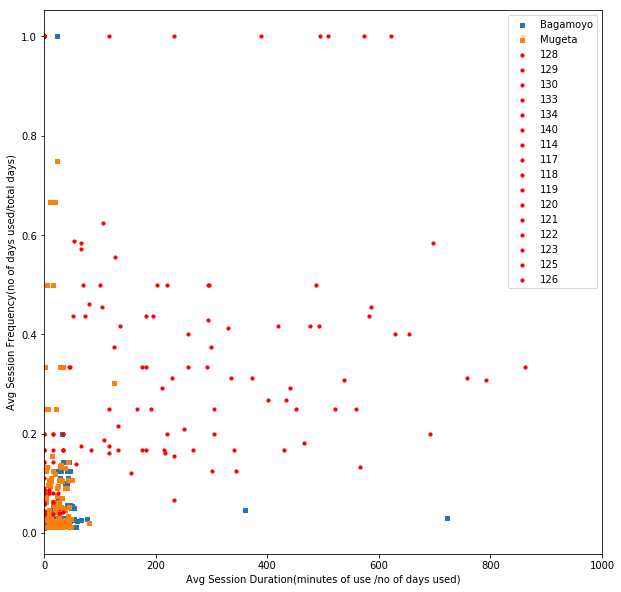

In [131]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
main_figure = plt.figure(figsize=(10,10))
ax1 = main_figure.add_subplot(111)

for village in list_villages_beta:
    dur, freq = dic_village_freqdur_beta_sites[village]
    dur = [d/60 for d in dur]
    ax1.scatter(dur,freq, s=10,marker='s', label=village)

for village in list_villages_field:
    dur, freq = dic_village_freqdur_field[village]
    dur = [d/60 for d in dur]
    ax1.scatter(dur,freq, s=10,c='r',label=village)
ax1.legend(loc=1)
#setting colors
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.xlabel('Avg Session Duration(minutes of use /no of days used)')
plt.ylabel('Avg Session Frequency(no of days used/total days)')
plt.xlim([0,1000])
plt.show()

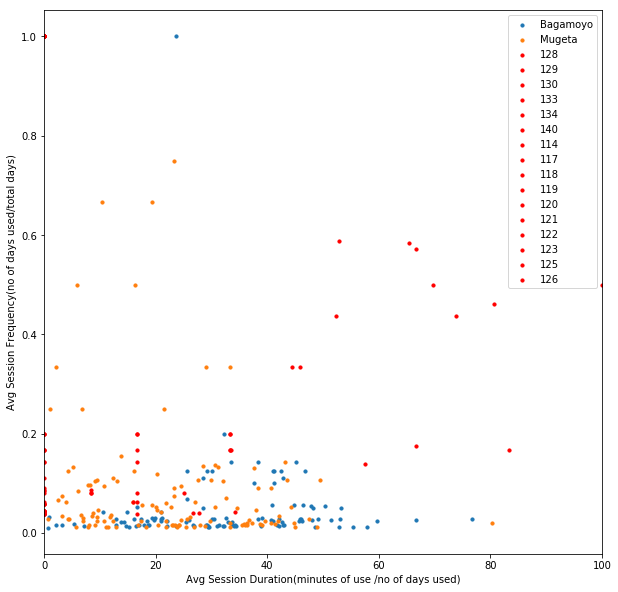

In [40]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
main_figure = plt.figure(figsize=(10,10))
ax1 = main_figure.add_subplot(111)

for village in list_villages_beta:
    dur, freq = dic_village_freqdur_beta_sites[village]
    dur = [d/60 for d in dur]
    ax1.scatter(dur,freq, s=10, label=village)

for village in list_villages_field:
    dur, freq = dic_village_freqdur_field[village]
    dur = [d/60 for d in dur]
    ax1.scatter(dur,freq, s=10, c='r',label=village)
ax1.legend(loc=1)
#setting colors
colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.xlabel('Avg Session Duration(minutes of use /no of days used)')
plt.ylabel('Avg Session Frequency(no of days used/total days)')
plt.xlim([0,100])
plt.show()


## Visualising and Analysing at Village Level

Visualising each village separately 

In [52]:
list_villages = []
for vill in list(dic_village_freqdur_beta_sites.keys()):
    list_villages.append(vill)
for vill in list(dic_village_freqdur_field.keys()):
    list_villages.append(vill)

## Calculating Metrics (Mean, variance)

### Defining function to calculate metrics

In [68]:
def getUsageMetrics(village):
    
    """
    Takes in the dataframe for the data and village name, calculates metrics (mean, std) for the village
    """
    
    if(village == "Mugeta" or village == "Bagamoyo"):
        list_avg_session_duration, list_avg_session_frequency = dic_village_freqdur_beta_sites[village]
    else:
        list_avg_session_duration, list_avg_session_frequency = dic_village_freqdur_field[village]
    array_avg_session_duration_minutes = np.array(list_avg_session_duration)/60
    array_avg_session_frequency = np.array(list_avg_session_frequency)
    mean_session_duration = np.mean(array_avg_session_duration_minutes)
    mean_session_frequency = np.mean(array_avg_session_frequency)
    std_session_duration = np.std(array_avg_session_duration_minutes)
    std_session_frequency = np.std(array_avg_session_frequency)
    return(mean_session_duration, mean_session_frequency, std_session_duration, std_session_frequency)

In [69]:
getUsageMetrics("Mugeta")

(23.52658271633478, 0.0871302010432246, 16.769767187045883, 0.131367598062253)

### Calculating and storing metrics

In [70]:
dic_metrics = { village:getUsageMetrics(village) for village in list_villages}

In [71]:
dic_metrics

{'Bagamoyo': (41.38636595310906,
  0.04798331574884766,
  73.92860389327302,
  0.09939182577185476),
 'Mugeta': (23.52658271633478,
  0.0871302010432246,
  16.769767187045883,
  0.131367598062253),
 128: (86.72222222222221,
  0.20207753826168148,
  141.12198120862288,
  0.2305875301915976),
 129: (276.01087662337665,
  0.24155011655011654,
  141.5743145832427,
  0.13202972932205997),
 130: (34.3, 0.041666666666666664, 0.0, 0.0),
 133: (20.370370370370367,
  0.1562962962962963,
  24.879683041748894,
  0.05489483648488565),
 134: (513.2007316468254,
  0.3429064042575072,
  629.0825758574746,
  0.2813059690681439),
 140: (117.06349206349209,
  0.20891963109354414,
  94.06261106388529,
  0.14838715714364295),
 114: (27.200000000000003, 0.04, 0.5999999999999996, 0.0),
 117: (345.40213064713066,
  0.32156407655900554,
  217.3098928384535,
  0.1392474756843623),
 118: (329.30333333333334, 0.368, 283.1356613199954, 0.3331306050185122),
 119: (0.0, 1.0, 0.0, 0.0),
 120: (638.6142113095239,
  0.

### Plotting the mean and variance for each village

In [75]:
a = [1,2,3]
b = [4,5,6]
for m in a,b:
    print()

1
4


In [81]:
np.random.rand(2) * 10

array([8.36512936, 2.17681603])

73.92860389327302 0.09939182577185476
16.769767187045883 0.131367598062253
141.12198120862288 0.2305875301915976
141.5743145832427 0.13202972932205997
0.0 0.0
24.879683041748894 0.05489483648488565
629.0825758574746 0.2813059690681439
94.06261106388529 0.14838715714364295
0.5999999999999996 0.0
217.3098928384535 0.1392474756843623
283.1356613199954 0.3331306050185122
0.0 0.0
1318.483326212039 0.33043374218537774
483.3746535517278 0.12384743864932168
13.984928719608014 0.05867122229045554
5.237828008789242 0.03901445781101137
369.39536431810615 0.2780097516539604
67.10457118933083 0.1849095909656007


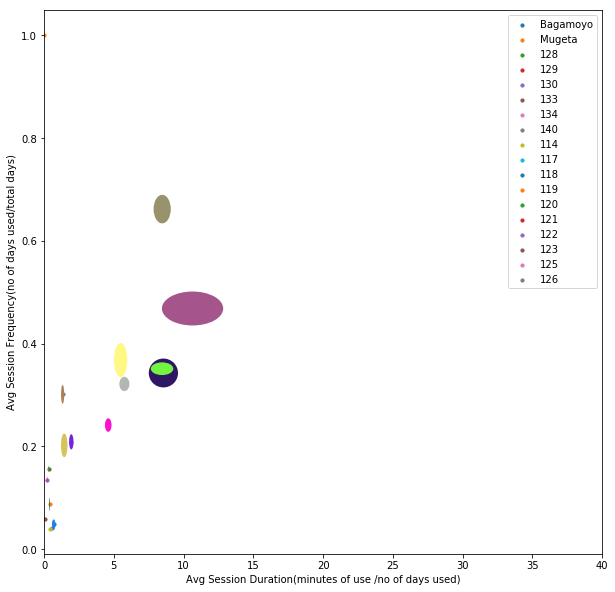

In [167]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
main_figure = plt.figure(figsize=(10,10))
ax1 = main_figure.add_subplot(111)
list_mean_session_duration = []
list_mean_session_frequency = []
list_std_session_duration = []
list_std_session_frequency = []
ells = []
#populating the lists above
for vill in list_villages:
    dur_vill = dic_metrics[vill][0]
    freq_vill = dic_metrics[vill][1]
    ax1.scatter(dur_vill/60,freq_vill, s=10, label=vill)
    print(dic_metrics[vill][2],dic_metrics[vill][3])
    ells.append(Ellipse(xy=[dur_vill/60,freq_vill],
                width=dic_metrics[vill][2]*0.2/60, height=dic_metrics[vill][3]*0.2,
                angle=0))
for e in ells:
    ax1.add_artist(e)
#     e.set_clip_box(ax1.bbox)
#     e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))
#     list_std_session_duration.append(dic_metrics[vill][2])
#     list_std_session_frequency.append(dic_metrics[vill][3])

# #converting in minutes:
# list_mean_session_duration = [d/60 for d in list_mean_session_duration]
# list_std_session_duration = [d/60 for d in list_std_session_duration]

# ax1.scatter(list_mean_session_duration,list_mean_session_frequency, s=10, label)
# for village in list_villages_beta:
#     dur, freq = dic_village_freqdur_beta_sites[village]
#     dur = [d/60 for d in dur]
#     ax1.scatter(dur,freq, s=10, label=village)

# for village in list_villages_field:
#     dur, freq = dic_village_freqdur_field[village]
#     dur = [d/60 for d in dur]
#     ax1.scatter(dur,freq, s=10, c='r',label=village)
ax1.legend(loc=1)
# #setting colors
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])
plt.xlabel('Avg Session Duration(minutes of use /no of days used)')
plt.ylabel('Avg Session Frequency(no of days used/total days)')
plt.xlim([0,40])
plt.show()

73.92860389327302 0.09939182577185476
16.769767187045883 0.131367598062253
141.12198120862288 0.2305875301915976
141.5743145832427 0.13202972932205997
0.0 0.0
24.879683041748894 0.05489483648488565
629.0825758574746 0.2813059690681439
94.06261106388529 0.14838715714364295
0.5999999999999996 0.0
217.3098928384535 0.1392474756843623
283.1356613199954 0.3331306050185122
0.0 0.0
1318.483326212039 0.33043374218537774
483.3746535517278 0.12384743864932168
13.984928719608014 0.05867122229045554
5.237828008789242 0.03901445781101137
369.39536431810615 0.2780097516539604
67.10457118933083 0.1849095909656007


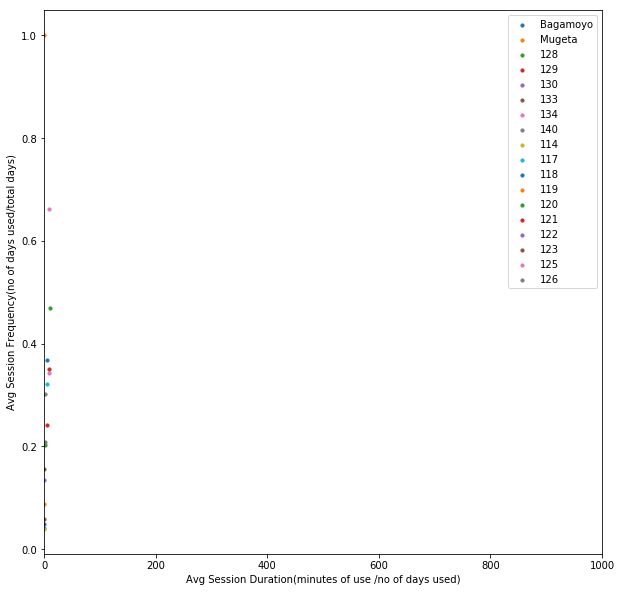

In [118]:
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
main_figure = plt.figure(figsize=(10,10))
ax1 = main_figure.add_subplot(111)
ells = []
#populating the lists above
for vill in list_villages:
    dur_vill = dic_metrics[vill][0]
    freq_vill = dic_metrics[vill][1]
    ax1.scatter(dur_vill/60,freq_vill, s=10, label=vill)
    print(dic_metrics[vill][2],dic_metrics[vill][3])
    ells.append(Ellipse(xy=[dur_vill/60,freq_vill],
                width=dic_metrics[vill][2]*0.2/60, height=dic_metrics[vill][3]*0.2,
                angle=0))
for e in ells:
    ax1.add_artist(e)
#     e.set_clip_box(ax1.bbox)
#     e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))
#     list_std_session_duration.append(dic_metrics[vill][2])
#     list_std_session_frequency.append(dic_metrics[vill][3])

# #converting in minutes:
# list_mean_session_duration = [d/60 for d in list_mean_session_duration]
# list_std_session_duration = [d/60 for d in list_std_session_duration]

# ax1.scatter(list_mean_session_duration,list_mean_session_frequency, s=10, label)
# for village in list_villages_beta:
#     dur, freq = dic_village_freqdur_beta_sites[village]
#     dur = [d/60 for d in dur]
#     ax1.scatter(dur,freq, s=10, label=village)

# for village in list_villages_field:
#     dur, freq = dic_village_freqdur_field[village]
#     dur = [d/60 for d in dur]
#     ax1.scatter(dur,freq, s=10, c='r',label=village)
ax1.legend(loc=1)
# #setting colors
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax1.lines))]
# for i,j in enumerate(ax1.lines):
#     j.set_color(colors[i])
plt.xlabel('Avg Session Duration(minutes of use /no of days used)')
plt.ylabel('Avg Session Frequency(no of days used/total days)')
plt.xlim([0,40])
plt.show()

In [110]:
df_metrics = pd.DataFrame.from_dict(dic_metrics)
df_metrics.index = ['mean_dur','mean_freq','var_dur','var_freq']
df_metrics

,Bagamoyo,Mugeta,128,129,130,133,134,140,114,117,118,119,120,121,122,123,125,126
mean_dur,41.386366,23.526583,86.722222,276.010877,34.300000,20.370370,513.200732,117.063492,27.20,345.402131,329.303333,0.0,638.614211,507.492708,13.095238,1.851852,508.034188,79.762659
mean_freq,0.047983,0.087130,0.202078,0.241550,0.041667,0.156296,0.342906,0.208920,0.04,0.321564,0.368000,1.0,0.468466,0.351253,0.135321,0.059494,0.661966,0.301290
var_dur,73.928604,16.769767,141.121981,141.574315,0.000000,24.879683,629.082576,94.062611,0.60,217.309893,283.135661,0.0,1318.483326,483.374654,13.984929,5.237828,369.395364,67.104571
var_freq,0.099392,0.131368,0.230588,0.132030,0.000000,0.054895,0.281306,0.148387,0.00,0.139247,0.333131,0.0,0.330434,0.123847,0.058671,0.039014,0.278010,0.184910


Observations:

*  Villages closest to Mugeta and Bagamoyo in terms of session duration and session frequency.


In [178]:
for v in list_villages:
    print("village: ", v)
    print("distance from Mugeta in terms of standard deviation is: ", abs(dic_metrics["Mugeta"][0] - dic_metrics[v][0])/(dic_metrics[v][2]), " times")

village:  Bagamoyo
distance from Mugeta in terms of standard deviation is:  0.24158150291269598  times
village:  Mugeta
distance from Mugeta in terms of standard deviation is:  0.0  times
village:  128
distance from Mugeta in terms of standard deviation is:  0.4478086189313365  times
village:  129
distance from Mugeta in terms of standard deviation is:  1.7834046708987343  times
village:  130
distance from Mugeta in terms of standard deviation is:  inf  times
village:  133
distance from Mugeta in terms of standard deviation is:  0.1268590255216752  times
village:  134
distance from Mugeta in terms of standard deviation is:  0.7783940737240059  times
village:  140
distance from Mugeta in terms of standard deviation is:  0.994411151138778  times
village:  114
distance from Mugeta in terms of standard deviation is:  6.122362139442043  times
village:  117
distance from Mugeta in terms of standard deviation is:  1.4811822127678085  times
village:  118
distance from Mugeta in terms of standa

/home/amogh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
for v in list_villages:
    print("village: ", v)
    print("distance from Mugeta in terms of standard deviation is: ", abs(dic_metrics["Mugeta"][1] - dic_metrics[v][1])/(dic_metrics[v][3]), " times")

village:  Bagamoyo
distance from Mugeta in terms of standard deviation is:  0.39386423370705737  times
village:  Mugeta
distance from Mugeta in terms of standard deviation is:  0.0  times
village:  128
distance from Mugeta in terms of standard deviation is:  0.4984976296113928  times
village:  129
distance from Mugeta in terms of standard deviation is:  1.1695844284450179  times
village:  130
distance from Mugeta in terms of standard deviation is:  inf  times
village:  133
distance from Mugeta in terms of standard deviation is:  1.2599745200464418  times
village:  134
distance from Mugeta in terms of standard deviation is:  0.9092455594226051  times
village:  140
distance from Mugeta in terms of standard deviation is:  0.8207545207731417  times
village:  114
distance from Mugeta in terms of standard deviation is:  inf  times
village:  117
distance from Mugeta in terms of standard deviation is:  1.6835772021259572  times
village:  118
distance from Mugeta in terms of standard deviation 

/home/amogh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


## Debug: 

### Debugging expressions from the data

In [10]:
list_villages = list(set(df_data_beta_sites['KC (Village)']))
list_villages

['Mugeta', 'Bagamoyo']

In [97]:
x,y = getDurationFrequencyInVillage(df_data_beta_sites,"Bagamoyo")

Village Bagamoyo has 109 student ids


In [105]:
l = [a/60 for a in x]

### Visualisations

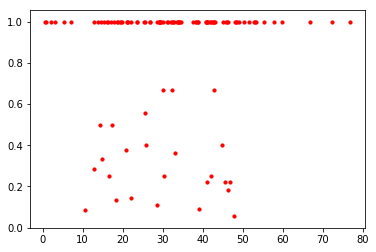

In [106]:
colormap = plt.cm.gist_ncar
main_figure = plt.figure()
ax1 = main_figure.add_subplot(111)
ax1.scatter(l,y, s=10, c='r', label='first')
plt.show()

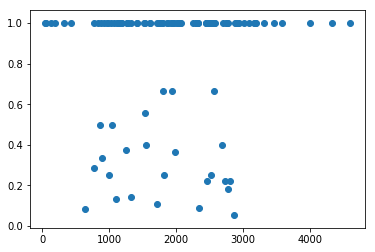

In [86]:
plt.scatter(x,y)

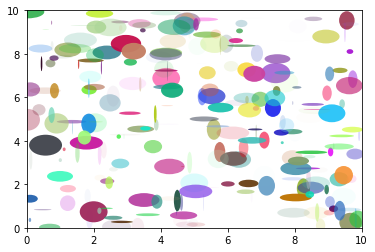

In [59]:
NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=0)
        for i in range(NUM)]

fig, ax = plt.subplots()

for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

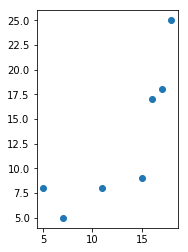

In [52]:
x = [5,7,11,15,16,17,18]
y = [8, 5, 8, 9, 17, 18, 25]
cov = np.cov(x, y)
lambda_, v = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
ax = plt.subplot(111, aspect='equal')
for j in range(1, 4):
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.scatter(x, y)
plt.show()

## To read and explore:

https://onlinelibrary.wiley.com/doi/pdf/10.1111/tops.12208

#### Trying out linear modeling